<a href="https://colab.research.google.com/github/pallmallking/ALminerals/blob/main/ALminerals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  df = pd.read_csv('/content/MineralDB_GSA_upload_09-04.csv', delimiter='|', encoding='latin-1')
  print("Successfully read with | delimiter and latin-1 encoding.")
  df.head()
except Exception as e:
  print(f"Error reading with | delimiter and latin-1 encoding: {e}")
  print("Could not read with | delimiter and latin-1 encoding. Attempting to diagnose the issue by reading line by line.")
  # If still fails, try reading line by line to diagnose
  with open('/content/MineralDB_GSA_upload_09-04.csv', 'r', encoding='latin-1') as f:
    for i, line in enumerate(f):
      if i < 10: # Print first 10 lines to inspect
        print(f"Line {i+1}: {line.strip()}")
      else:
        break

Successfully read with | delimiter and latin-1 encoding.


In [5]:
df.head()

,Title,Abstract,dataType,supplementalInformation,coordinates,datasetReferenceDate,SE_ID_PROC,State,Contact,Contact_Em,...,GSA_FID,Ref_Link,County,PLSS,Add_Loc,Original_entry,Citation,Updates,Notes,7.5-minute Quadrangle Name
0,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4560940126,32.6947132999","June 11, 2020",1,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.01.20.001,NaN,Autauga,"SE1/4SE1/4 Sec. 21, T. 20 N., R. 16 E.",NaN,"June 11, 2020","Lesher, C.M., Cook, R.B., and Dean, L.D., 1989...",NaN,No production data or development information ...,Marbury
1,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4475006842,32.6947593584","June 11, 2020",2,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.01.20.002,NaN,Autauga,"SE1/4SW1/4 Sec. 22, T. 20 N., R. 16 E.",NaN,"June 11, 2020","Lesher, C.M., Cook, R.B., and Dean, L.D., 1989...",NaN,No production data or development information ...,Marbury
2,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4346233316,32.6947139465","June 11, 2020",3,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.01.20.003,NaN,Autauga,"SW1/4SW1/4 Sec. 23, T. 20 N., R. 16 E.",NaN,"June 11, 2020","Lesher, C.M., Cook, R.B., and Dean, L.D., 1989...",NaN,No production data or development information ...,Marbury
3,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4261033165,32.7019560957","June 11, 2020",4,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.01.20.004,NaN,Autauga,"SW1/4NE1/4 Sec. 23, T. 20 N., R. 16 E.",NaN,"June 11, 2020","Lesher, C.M., Cook, R.B., and Dean, L.D., 1989...",NaN,No production data or development information ...,Marbury
4,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4863362542,32.6907535337","June 11, 2020",5,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.01.20.005,NaN,Autauga,"NW1/4NW1/4 Sec. 29, T. 20 N., R. 16 E.",NaN,"June 11, 2020","Lesher, C.M., Cook, R.B., and Dean, L.D., 1989...",NaN,No production data or development information ...,Marbury


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       4419 non-null   object 
 1   Abstract                    4419 non-null   object 
 2   dataType                    4419 non-null   object 
 3   supplementalInformation     4419 non-null   object 
 4   coordinates                 4419 non-null   object 
 5   datasetReferenceDate        4419 non-null   object 
 6   SE_ID_PROC                  4419 non-null   int64  
 7   State                       4419 non-null   object 
 8   Contact                     4419 non-null   object 
 9   Contact_Em                  4419 non-null   object 
 10  Contact_Ph                  4419 non-null   object 
 11  Site_Name                   4419 non-null   object 
 12  Latitude                    4419 non-null   float64
 13  Longitude                   4419 

,SE_ID_PROC,Latitude,Longitude,Ref_Link,Updates
count,4419.000000,4419.000000,4419.000000,0.0,0.0
mean,2210.000000,32.883501,-85.357390,NaN,NaN
std,1275.799749,2.616467,6.588542,NaN,NaN
min,1.000000,0.000000,-88.178302,NaN,NaN
25%,1105.500000,32.848197,-86.182871,NaN,NaN
50%,2210.000000,33.004681,-85.777305,NaN,NaN
75%,3314.500000,33.453163,-85.454305,NaN,NaN
max,4419.000000,34.998540,0.000000,NaN,NaN


### Geographic Distribution

Let's visualize the locations based on Latitude and Longitude. We can use a scatter plot for this.

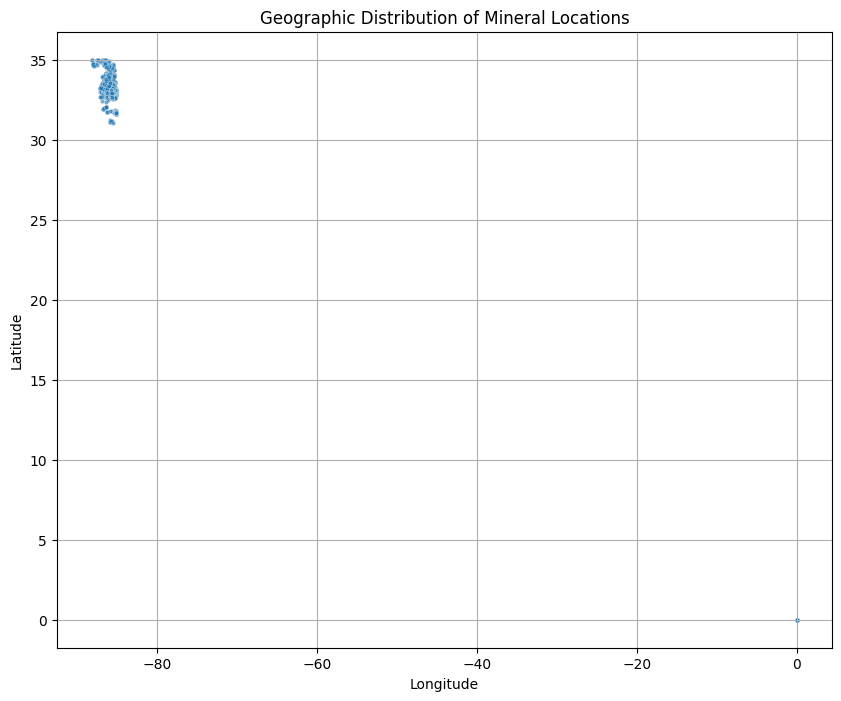

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.6, s=10)
plt.title('Geographic Distribution of Mineral Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Analysis of Production and Resource Amount Columns

Now, let's look at the columns with some data: `Prod_ApprxAmnt` and `Res_AppxCont`. Since these columns have very few non-null values, we'll just display the rows where these values are present to see the context.

In [8]:
print("Rows with Production Approximate Amount:")
display(df[df['Prod_ApprxAmnt'].notna()])

print("\nRows with Resource Approximate Content:")
display(df[df['Res_AppxCont'].notna()])

Rows with Production Approximate Amount:


,Title,Abstract,dataType,supplementalInformation,coordinates,datasetReferenceDate,SE_ID_PROC,State,Contact,Contact_Em,...,GSA_FID,Ref_Link,County,PLSS,Add_Loc,Original_entry,Citation,Updates,Notes,7.5-minute Quadrangle Name
339,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'D. C. Wea...,Mineral location,"Geological Survey of Alabama, Publications Off...","-87.058401578,33.0074038299","June 11, 2020",340,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.04.20.002,NaN,Bibb,"NE1/4 Sec. 3, T. 23 N., R. 10 E.",NaN,"June 11, 2020","Adams, G.I., and Jones, W.B., 1940, Barite dep...",NaN,No production data or development information ...,West Blocton East
345,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Julian Fa...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.9887666181,33.0577219025","June 11, 2020",346,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.04.20.008,NaN,Bibb,"SE1/4SE1/4 Sec. 17, T. 24 N., R. 11 E.",NaN,"June 11, 2020","Adams, G.I., and Jones, W.B., 1940, Barite dep...",NaN,No production data or development information ...,Aldrich
417,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'A. A. Wil...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.8071849737,33.9025483745","June 11, 2020",418,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.08.20.001,NaN,Calhoun,"NW1/4 Sec. 16, T. 13 S., R. 8 E.",NaN,"June 11, 2020","Adams, G.I., and Jones, W.B., 1940, Barite dep...",NaN,"Approximately 40 carloads (~1,200 (short) tons...",Colvin Gap
420,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Angel Min...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.832093238,33.838779239","June 11, 2020",421,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.08.20.004,NaN,Calhoun,"NE1/4SE1/4 Sec. 6, T. 14 S., R. 8 E.",Located approximately 3.0-miles west of Jackso...,"June 11, 2020","Wingard, J.H., 1921, Statistics of the mineral...",NaN,"Total production estimated to be about 4,000 (...",Jacksonville West
421,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Anniston ...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.8080191142,33.6692063502","June 11, 2020",422,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.08.20.005,NaN,Calhoun,"NW1/4 Sec. 4, T. 16 S., R. 8 E.",NaN,"June 11, 2020","Neathery, T.L., Clarke, O.M., Jr., Smith, W.E....",NaN,A small amount of manganese ore was mined duri...,Anniston
422,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Bertha Mi...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.8229633189,33.867871032","June 11, 2020",423,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.08.20.006,NaN,Calhoun,"NE1/4SW1/4 Sec. 29, T. 13 S., R. 8 E.",NaN,"June 11, 2020","Wingard, J.H., 1922, Statistics of the mineral...",NaN,"An estimated 25,000 (short) tons of barite pro...",Jacksonville West
425,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Bud Clark...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.8450118605,33.8132850159","June 11, 2020",426,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.08.20.009,NaN,Calhoun,"SW1/4NW1/4 Sec. 18, T. 14 S., R. 8 E.",NaN,"June 11, 2020","Adams, G.I., and Jones, W.B., 1940, Barite dep...",NaN,Reported that three carloads of barite produce...,Jacksonville West
433,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Jere L. E...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.8229633189,33.867871032","June 11, 2020",434,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.08.20.017,NaN,Calhoun,"NE1/4SW1/4 Sec. 29, T. 13 S., R. 8 E.",NaN,"June 11, 2020","Hughes, T.H.


Rows with Resource Approximate Content:


,Title,Abstract,dataType,supplementalInformation,coordinates,datasetReferenceDate,SE_ID_PROC,State,Contact,Contact_Em,...,GSA_FID,Ref_Link,County,PLSS,Add_Loc,Original_entry,Citation,Updates,Notes,7.5-minute Quadrangle Name
348,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Sinks min...,Mineral location,"Geological Survey of Alabama, Publications Off...","-87.027867651,33.0479821578","June 11, 2020",349,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.04.20.011,NaN,Bibb,"Sec. 24, T. 24 N., R. 10 E.",Located approximately 10.6-miles east of Centr...,"June 11, 2020","Adams, G.I., and Jones, W.B., 1940, Barite dep...",NaN,"Approximately 300,000 tons of barite estimated...",West Blocton East
1291,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Murnaghan...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.4543047411,34.0308540099","June 11, 2020",1292,AL,John Whitmore,jwhitmore@gsa.alabama.gov,...,ALMIN.10.20.028,NaN,Cherokee,"SW1/4SW1/4 Sec. 35, T. 11 S., R. 11 E.",NaN,"June 11, 2020","Jones, W.B., 1929, Summary report on the bauxi...",NaN,"A large quantity of ore mined, but no producti...",Indian Mountain
1439,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Bama (Fla...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.4705493339,32.7545109667","June 11, 2020",1440,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.11.20.017,NaN,Chilton,"SW1/4 Sec. 33, T. 21 N., R. 16 E.",Located on the Mitchell Dam 7.5-minute quadran...,"June 11, 2020","Abele, C.A., 1913a, Statistics of the mineral ...",NaN,No production data provided. The pit measures ...,Mitchell Dam
1725,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Superior ...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.962091,33.255735","June 11, 2020",1726,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.14.20.200,NaN,Clay,"NW1/4SW1/4 Sec. 30, T. 20 S., R. 7 E.",Located approximately 0.5-mile southwest of th...,"June 11, 2020","Jones, W.B., 1920, Statistics of the mineral p...",NaN,No production data provided. A narrow cut meas...,Clairmont Springs
2641,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Ceylon Gr...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.177997578,33.0716150957","June 11, 2020",2642,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.19.20.004,NaN,Coosa,"NW1/4 Sec. 16, T. 24 N., R. 19 E.",Located on the Goodwater 7.5-minute quadrangle...,"June 11, 2020","Smith, E.A., 1918, Statistics of the mineral p...",NaN,No production data or development information ...,Hollins
2658,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'McAlliste...,Mineral location,"Geological Survey of Alabama, Publications Off...","-86.2457117504,32.8885969749","June 11, 2020",2659,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.19.20.021,NaN,Coosa,"SW1/4 Sec. 14, T. 22 N., R. 18 E.",NaN,"June 11, 2020","Cook, R.B., Jr., Dean, L.S., and Foord, E.E., ...",NaN,No production data or development information ...,Rockford
3514,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed o...,Mineral location,"Geological Survey of Alabama, Publications Off...","-85.5274098349,31.0733487731","June 11, 2020",3515,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.31.20.003,NaN,Geneva,"Sec. 10, T. 1 N., R. 25 E.",NaN,"June 11, 2020","Clarke, O.M., Jr., 1966, Clay in Clarke, O.M.,...",NaN,No production data or development information ...,Slocomb


In [9]:
print("Rows with Latitude equal to 0:")
display(df[df['Latitude'] == 0])

Rows with Latitude equal to 0:


,Title,Abstract,dataType,supplementalInformation,coordinates,datasetReferenceDate,SE_ID_PROC,State,Contact,Contact_Em,...,GSA_FID,Ref_Link,County,PLSS,Add_Loc,Original_entry,Citation,Updates,Notes,7.5-minute Quadrangle Name
380,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",381,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.043,NaN,Bibb,"NE1/4SW1/4 Sec. 25, T. 24 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
381,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",382,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.044,NaN,Bibb,"NW1/4SW1/4 Sec. 25, T. 24 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
382,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",383,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.045,NaN,Bibb,"NW1/4NW1/4 Sec. 3, T. 23 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
383,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",384,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.046,NaN,Bibb,"SE1/4NW1/4 Sec. 3, T. 23 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
384,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",385,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.047,NaN,Bibb,"NE1/4NE1/4 Sec. 4, T. 23 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
385,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",386,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.048,NaN,Bibb,"SE1/4NE1/4 Sec. 25, T. 24 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
386,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",387,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.049,NaN,Bibb,"SW1/4NE1/4 Sec. 25, T. 24 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
387,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",388,AL,Dane VanDervoort,dvandervoort@gsa.alabama.gov,...,ALMIN.04.20.050,NaN,Bibb,"NE1/4NE1/4 Sec. 32, T. 24 N., R. 5 W.",NaN,"June 11, 2020","Szabo, M.W., Daniel, T.W., Jr., and Chaffin, H...",NaN,No production data or development information ...,NaN
388,Geological Survey of Alabama critical minerals...,Alabama critical minerals site name 'Unnamed p...,Mineral location,"Geological Survey of Alabama, Publications Off...","0,0","June 11, 2020",389,AL,D

In [10]:
print("Distribution of mineral locations by County:")
county_counts = df['County'].value_counts()
display(county_counts)

# Display the top 10 counties
print("\nTop 10 Counties with the most mineral locations:")
display(county_counts.head(10))

Distribution of mineral locations by County:


,count
County,
Coosa,753
Clay,739
Chambers,697
Barbour,331
Tallapoosa,302
Cleburne,290
Cherokee,159
Henry,157
Calhoun,150



Top 10 Counties with the most mineral locations:


,count
County,
Coosa,753
Clay,739
Chambers,697
Barbour,331
Tallapoosa,302
Cleburne,290
Cherokee,159
Henry,157
Calhoun,150


### Top 10 Counties Distribution
Let's visualize the distribution of mineral locations across the top 10 counties.

/tmp/ipython-input-11-3867955107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_counts.head(10).index, y=county_counts.head(10).values, palette='viridis')


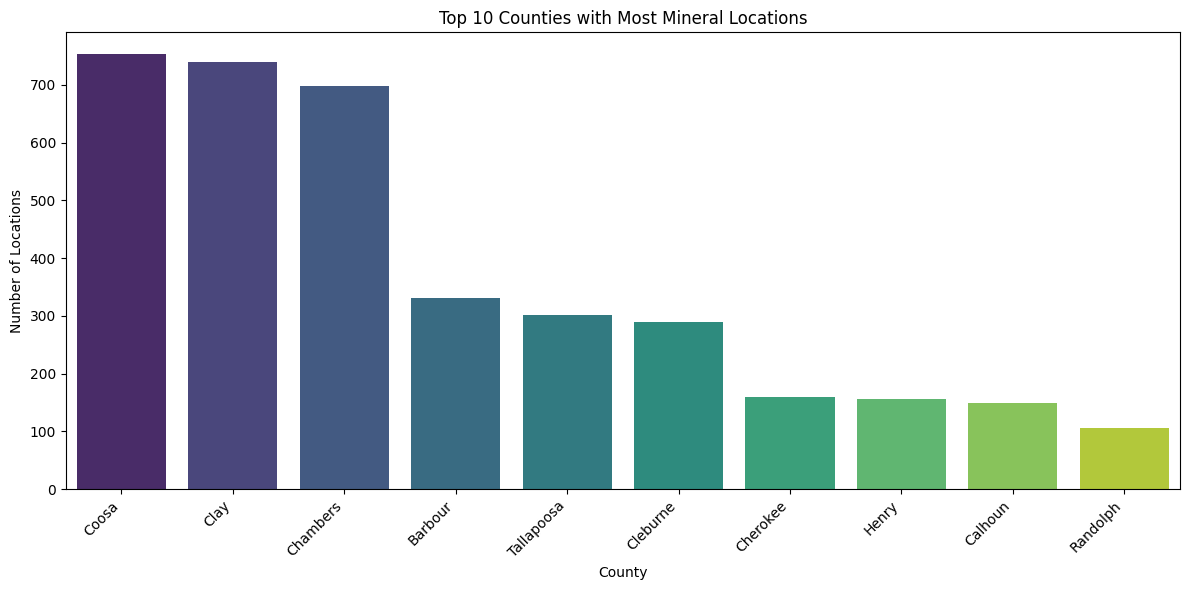

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=county_counts.head(10).index, y=county_counts.head(10).values, palette='viridis')
plt.title('Top 10 Counties with Most Mineral Locations')
plt.xlabel('County')
plt.ylabel('Number of Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Exploring PLSS Column
Now let's look into the `PLSS` column. This column contains information about the Public Land Survey System.

In [12]:
print("Unique values and their counts in the PLSS column:")
display(df['PLSS'].value_counts())

Unique values and their counts in the PLSS column:


,count
PLSS,
"Sec. 34, T. 16 S., R. 11 E.",53
"Sec. 13, T. 17 S., R. 11 E.",40
"NE1/4SW1/4 Sec. 21, T. 22 N., R. 26 E.",32
"Sec. 2, T. 17 S., R. 11 E.",32
"SW1/4NW1/4 Sec. 24, T. 18 S., R. 8 E.",29
...,...
"Sec. 14, T. 18 S., R. 8 E.",1
"NW1/4NE1/4 Sec. 23, T. 19 S., R. 8 E.",1
"SW1/4SW1/4 Sec. 22, T. 20 S., R. 7 E.",1
